In [78]:
import pyFAI
import fabio
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import os

<IPython.core.display.Javascript object>


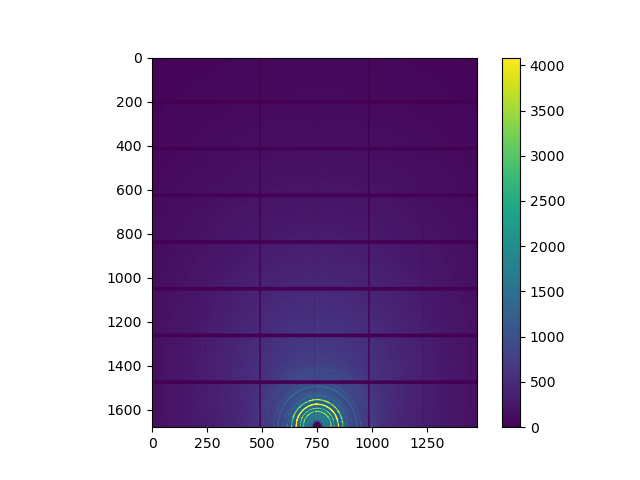

In [161]:
%matplotlib nbagg

direc = r'Z:\visitor\a311189\bm31\20230213\39_glycine_B1mm\pdf\xrd/' # Directory of xrd files
os.chdir(direc)
#enddirec = direc.replace(r'X:\staff\Dec2022','')
#dest = fr'Z:\bm31\inhouse\Dec2022/{enddirec}/'
#dest = r'Z:\bm31\inhouse\Dec2022/Ni\0p4mm\xrd/'
dest = direc
if not os.path.exists(dest):
    os.makedirs(dest)
mask  = r'Z:\visitor\a311189\bm31\20230213\dtx0_dtr15_baseMask_lines.edf' # Mask file
mask = fabio.open(mask).data
poni  = r'Z:\visitor\a311189\bm31\20230213\Si_0_15tilt.poni' # Poni file
poni = pyFAI.load(poni)



files = glob('*.cbf')
i1 = fabio.open(files[0]).data
dataset = np.empty(shape = (*i1.shape,len(files)))

doMonitor = True
basedir = r'Z:\visitor\a311189\bm31\20230213'
subdir = direc.replace(basedir,'')
source = f'X:/users/a311189/{subdir}'
#basefilename = os.path.splitext(files[0])[0].replace('_0001p_0','')
#monitorfile = f'{source}/LaB6_001_dtx_0_counts.dat' #{basefilename}_0_counts.dat' Ho2ScTaO7_RT_Q0p4_pdf_001_dtx_0_counts.dat Ho2ScTaO7_RT_Q0p4_pdf_001_dtx_0_0001p_0_counts.dat
#monitorfile = f'{source}/empty_Q0p4_pdf_001_dtx_0_counts.dat' #{basefilename}_0_counts.dat' Ho2ScTaO7_RT_Q0p4_pdf_001_dtx_0_counts.dat Ho2ScTaO7_RT_Q0p4_pdf_001_dtx_0_0001p_0_counts.dat
#monitorfile = r'X:\users\a311189\34_empty_Q0p4\pdf\xrd\empty_Q0p4_pdf_001_dtx_0_counts.dat'
#monitorfile = r'Z:\visitor\a311189\bm31\20230213\45_YNiO3_Q0p1mm\pdf\xrd\YNiO3_Q0p1mm_pdf_001_dtx_0_counts.dat'
monitorfile = os.path.join(direc,'glycine_B1mm_pdf_001_dtx_0_counts.dat')
monitor = np.loadtxt(monitorfile,usecols = 2, skiprows = 1)

scale = 10**6
for c,file in enumerate(files):
    
    array = fabio.open(file).data
    if doMonitor:
        array = (array/monitor[c])*scale
    dataset[:,:,c] = array
    
    vmax = np.percentile(np.where(np.isnan(array),0,array),99.9)
    #plt.figure()
    #plt.imshow(array,vmax = vmax)
    #plt.colorbar()
average = np.average(dataset,axis=2)
median = np.median(dataset,axis=2)
vmax = np.percentile(np.where(np.isnan(average),0,average),99.9)
plt.figure()
plt.imshow(average,vmax = vmax)
plt.colorbar()

<IPython.core.display.Javascript object>


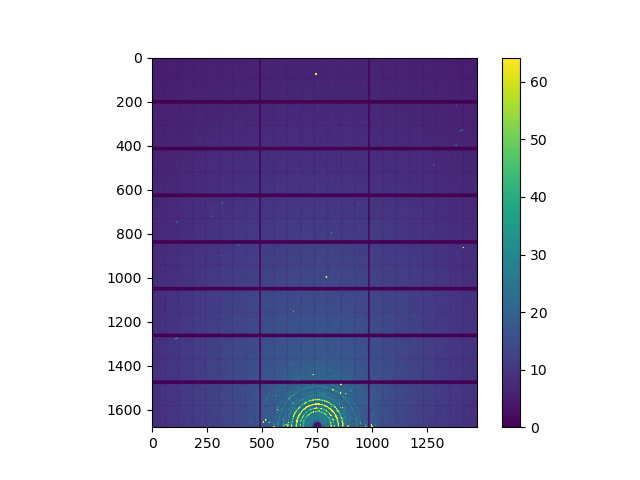

In [162]:
plt.figure()
stdev = np.std(dataset,axis = 2)
vmax = np.percentile(np.where(np.isnan(stdev),0,stdev),99.9)
plt.imshow(np.std(dataset,axis = 2),vmax = vmax)
plt.colorbar()

glycine_B1mm_pdf_001_dtx_0_0001p.cbf


<IPython.core.display.Javascript object>


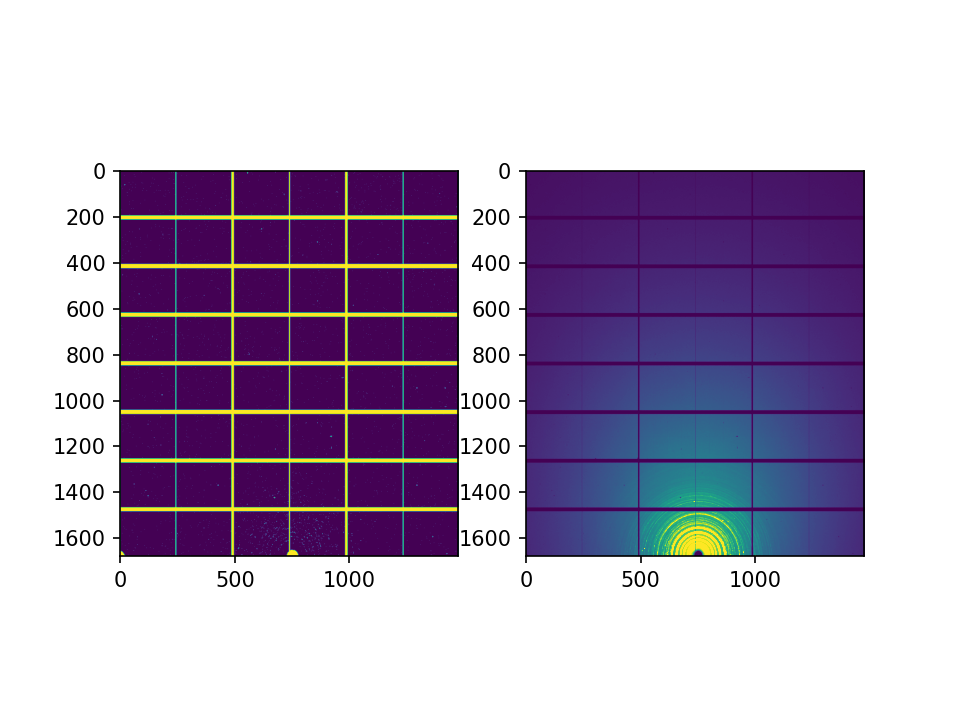

glycine_B1mm_pdf_001_dtx_0_0002p.cbf


<IPython.core.display.Javascript object>


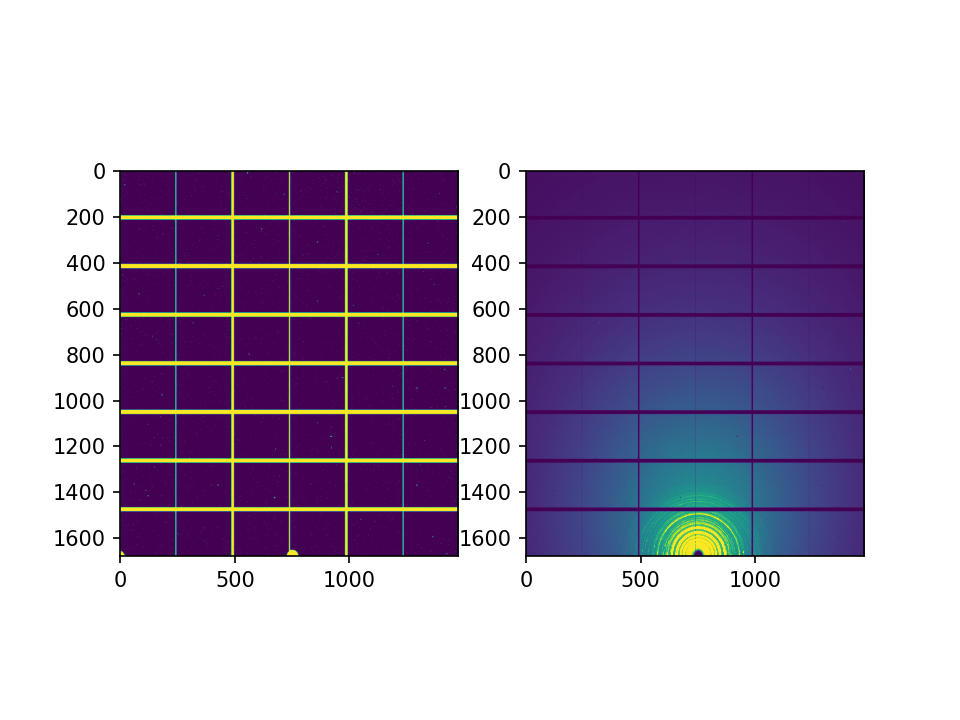

glycine_B1mm_pdf_001_dtx_0_0003p.cbf


<IPython.core.display.Javascript object>


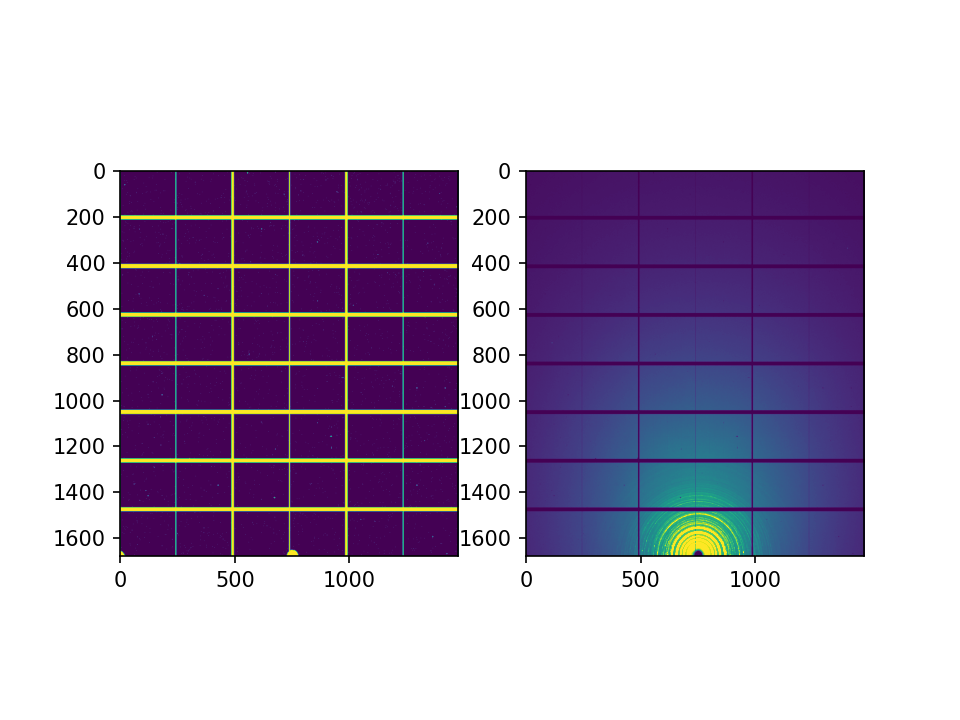

glycine_B1mm_pdf_001_dtx_0_0004p.cbf


<IPython.core.display.Javascript object>


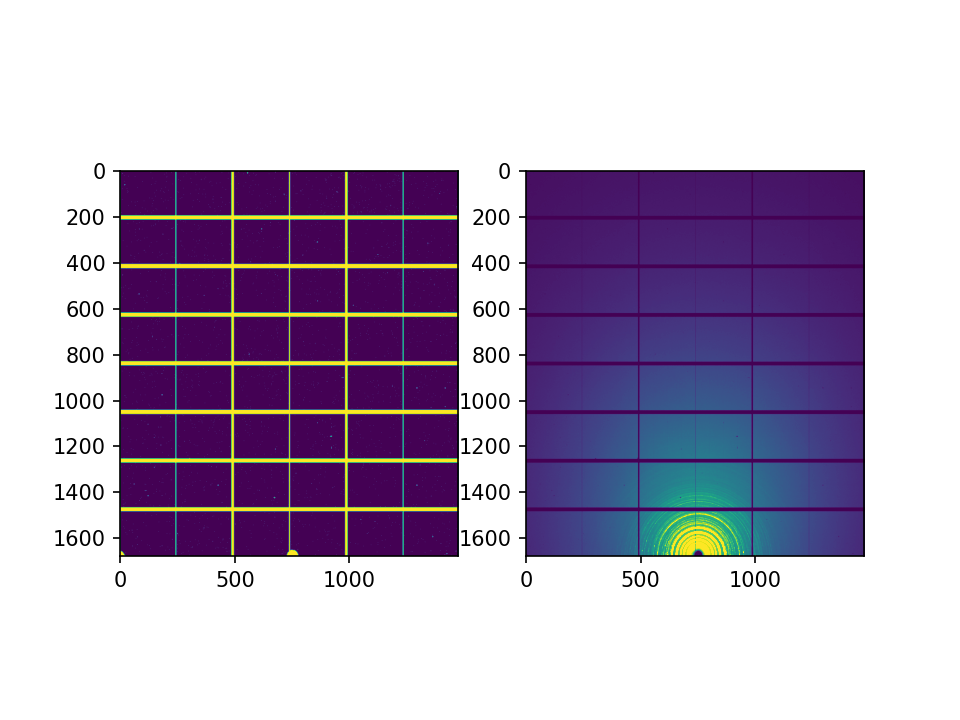

glycine_B1mm_pdf_001_dtx_0_0005p.cbf


<IPython.core.display.Javascript object>


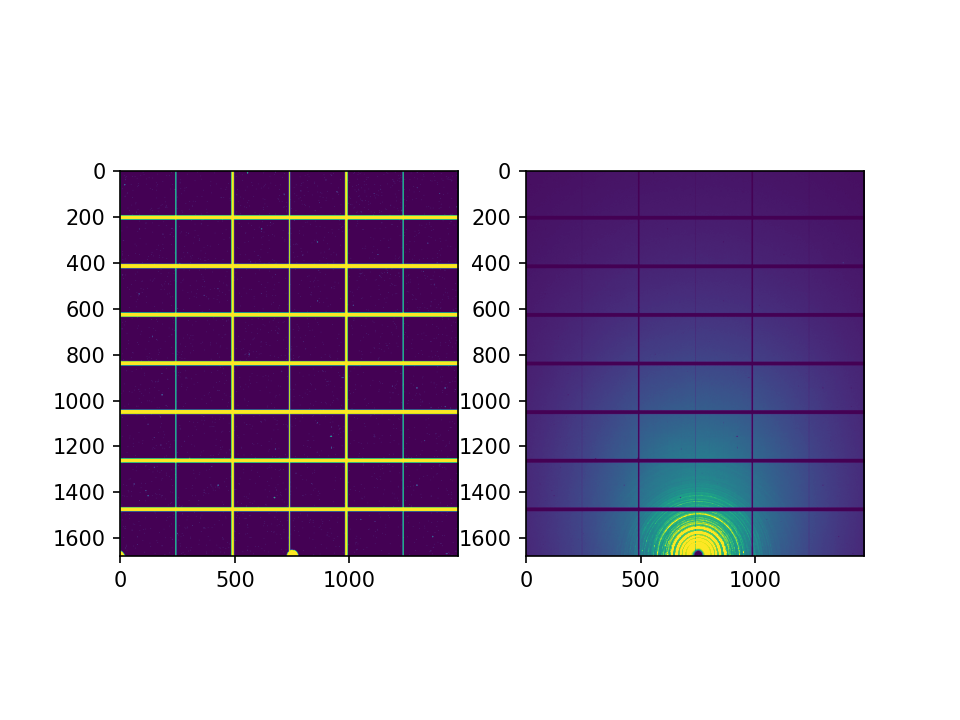

glycine_B1mm_pdf_001_dtx_0_0006p.cbf


<IPython.core.display.Javascript object>


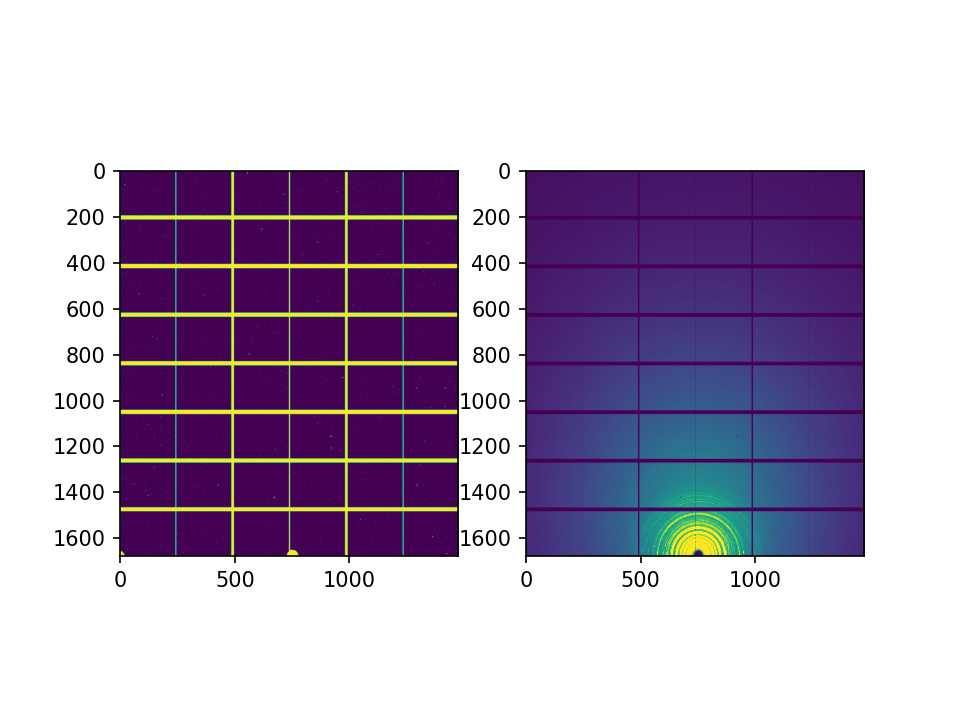

glycine_B1mm_pdf_001_dtx_0_0007p.cbf


<IPython.core.display.Javascript object>


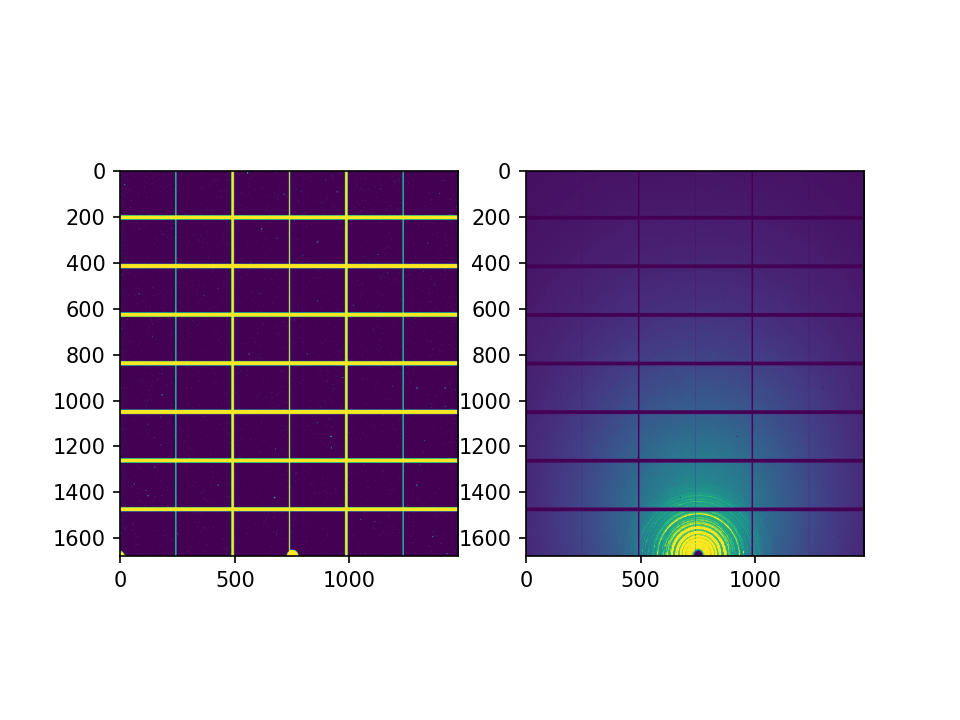

glycine_B1mm_pdf_001_dtx_0_0008p.cbf


<IPython.core.display.Javascript object>


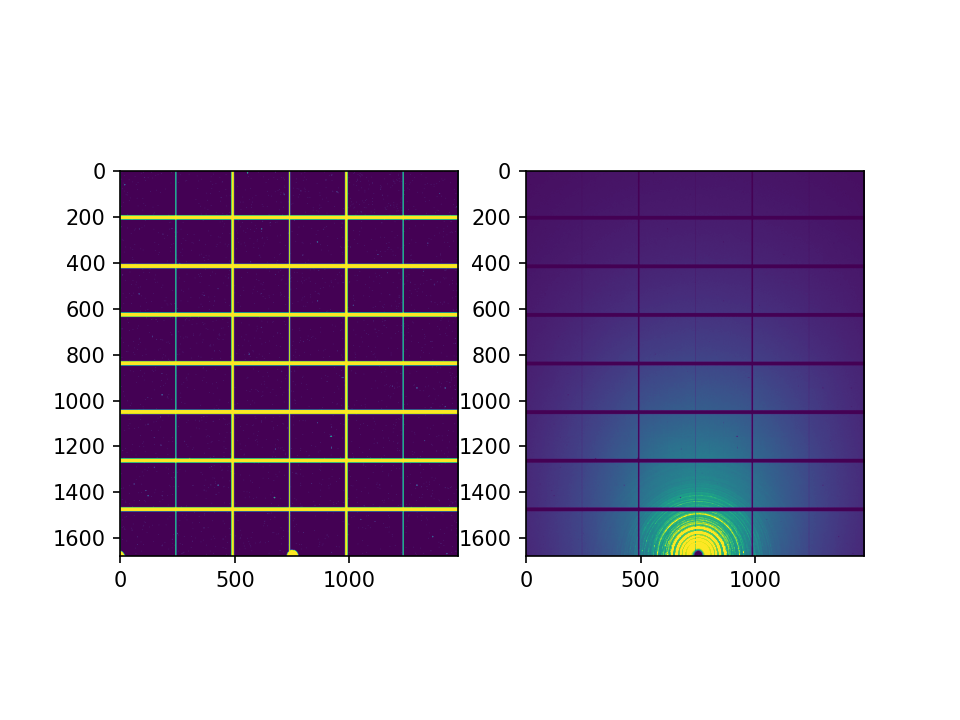

glycine_B1mm_pdf_001_dtx_0_0009p.cbf


<IPython.core.display.Javascript object>


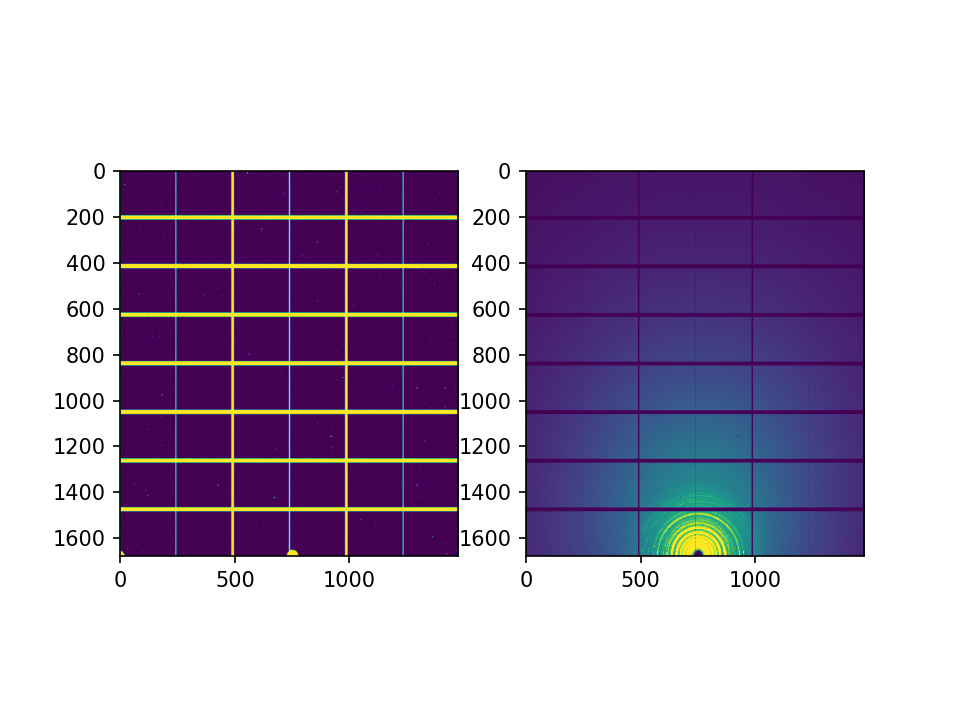

glycine_B1mm_pdf_001_dtx_0_0010p.cbf


<IPython.core.display.Javascript object>


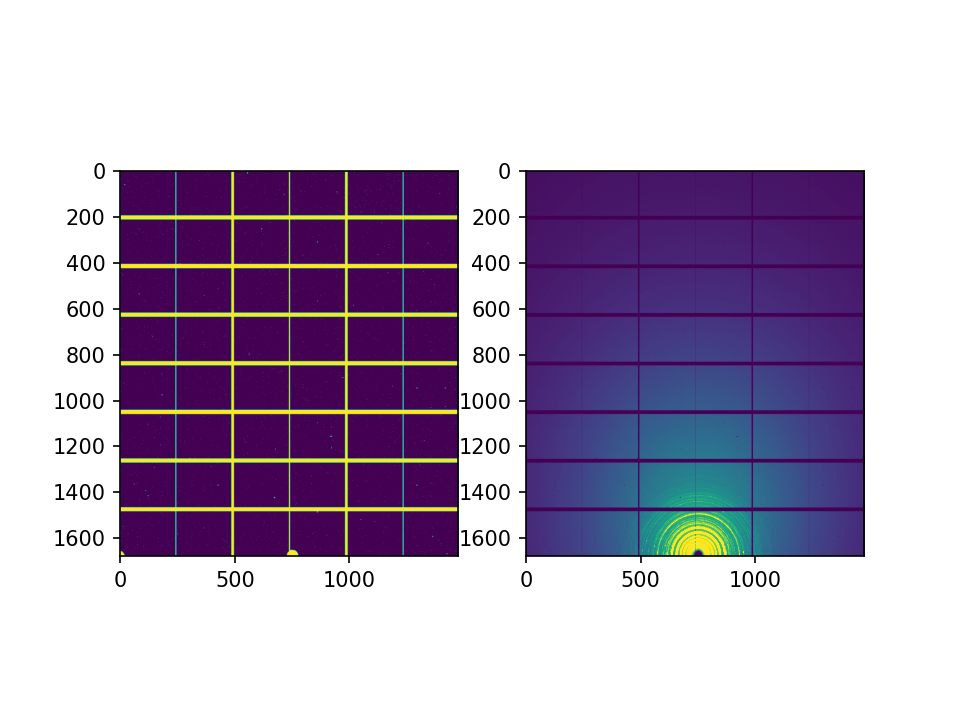

glycine_B1mm_pdf_001_dtx_0_0011p.cbf


<IPython.core.display.Javascript object>


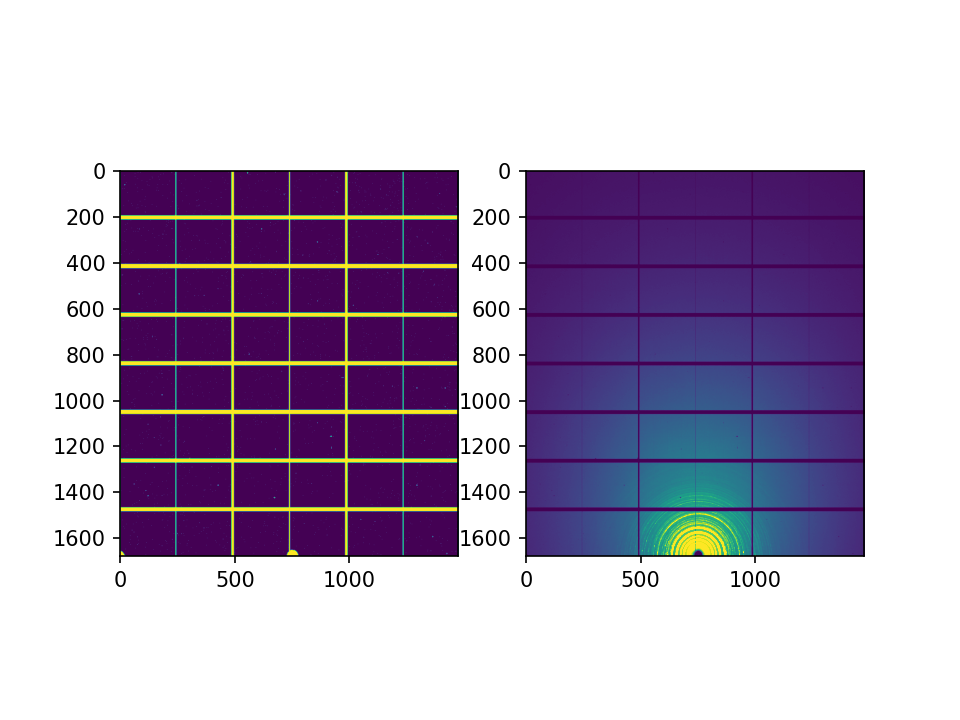

glycine_B1mm_pdf_001_dtx_0_0012p.cbf


<IPython.core.display.Javascript object>


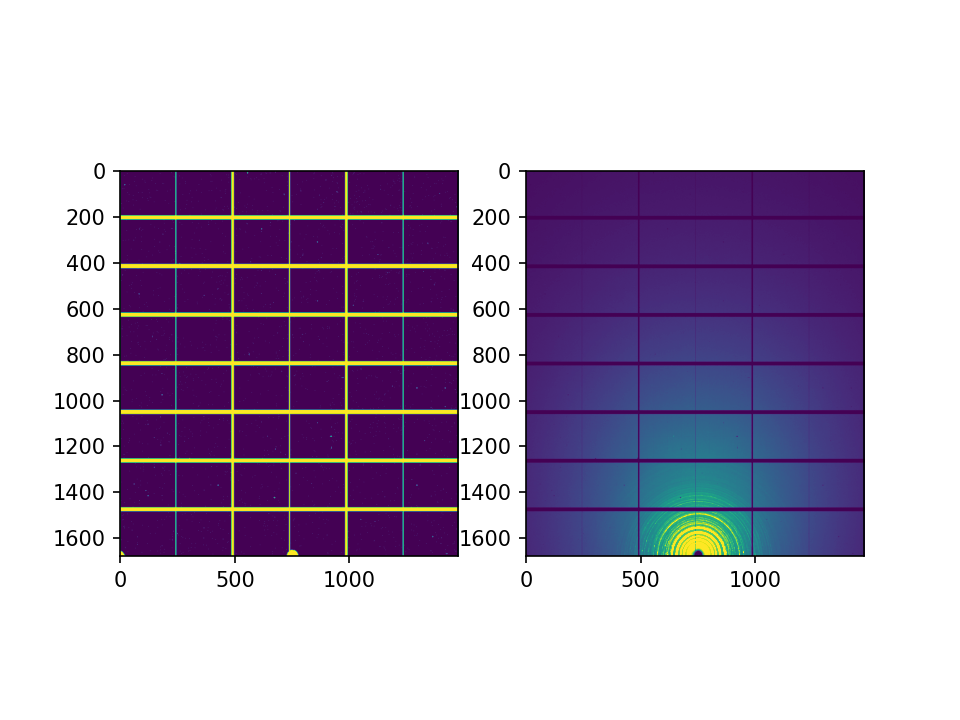

glycine_B1mm_pdf_001_dtx_0_0013p.cbf


<IPython.core.display.Javascript object>


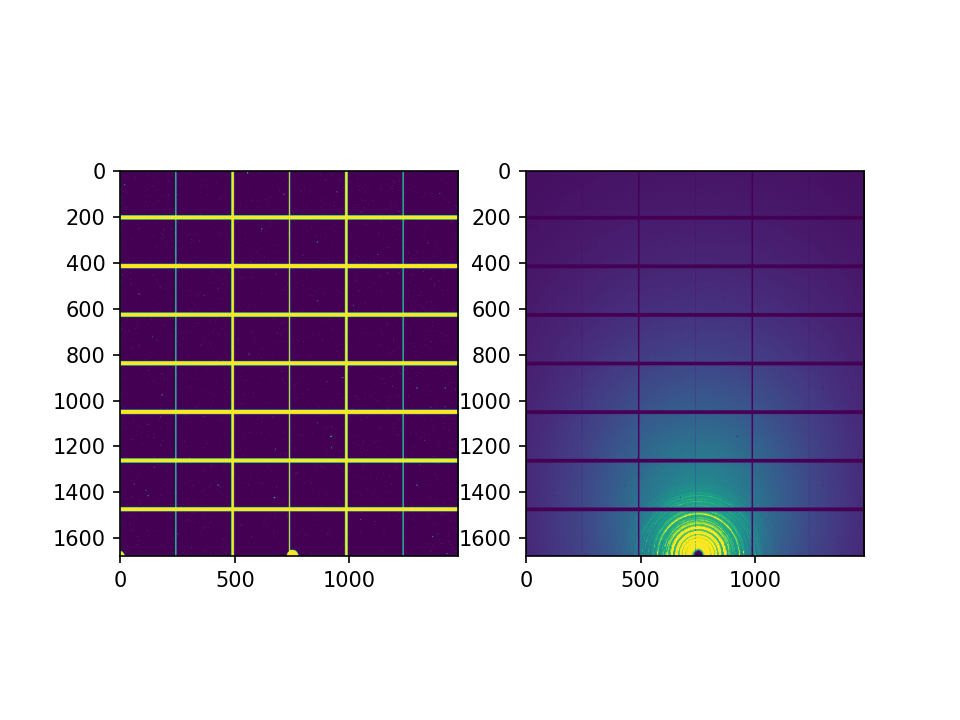

glycine_B1mm_pdf_001_dtx_0_0014p.cbf


<IPython.core.display.Javascript object>


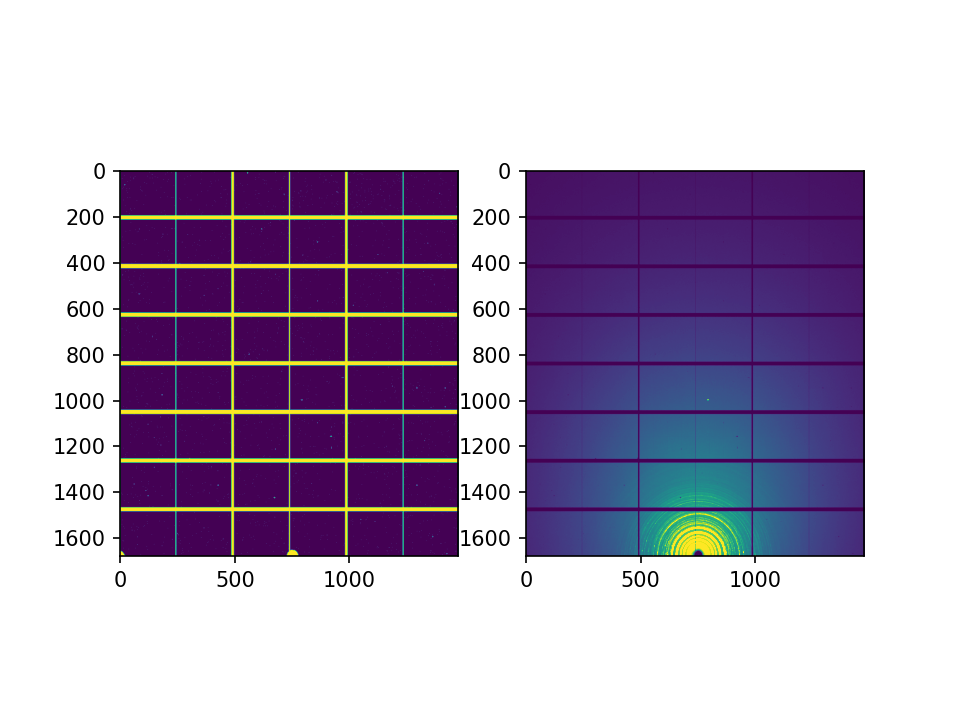

glycine_B1mm_pdf_001_dtx_0_0015p.cbf


<IPython.core.display.Javascript object>


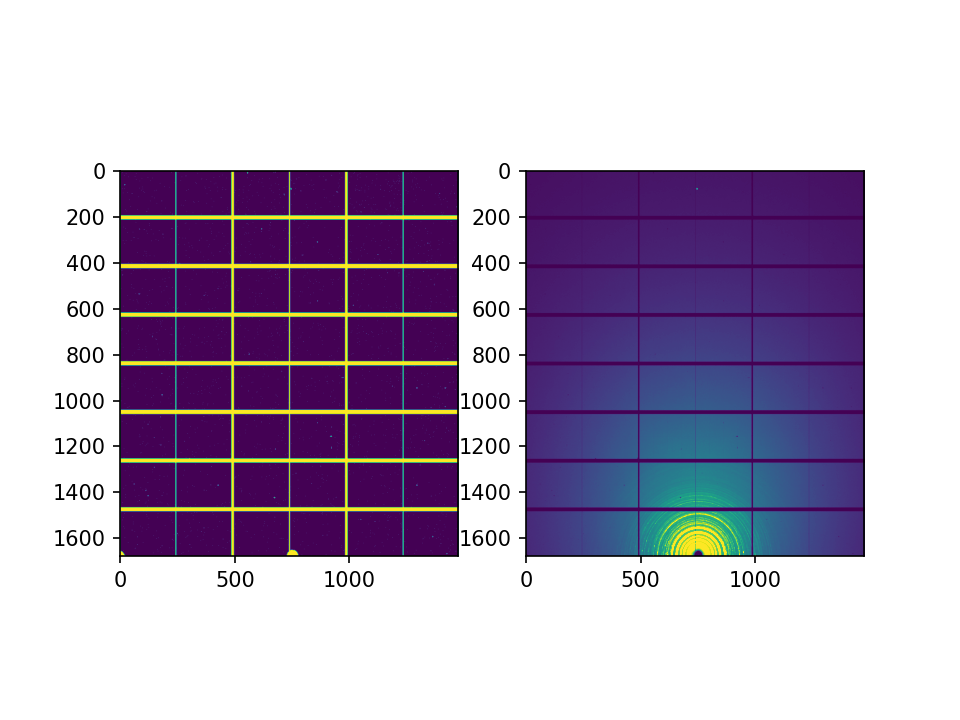

glycine_B1mm_pdf_001_dtx_0_0016p.cbf


<IPython.core.display.Javascript object>


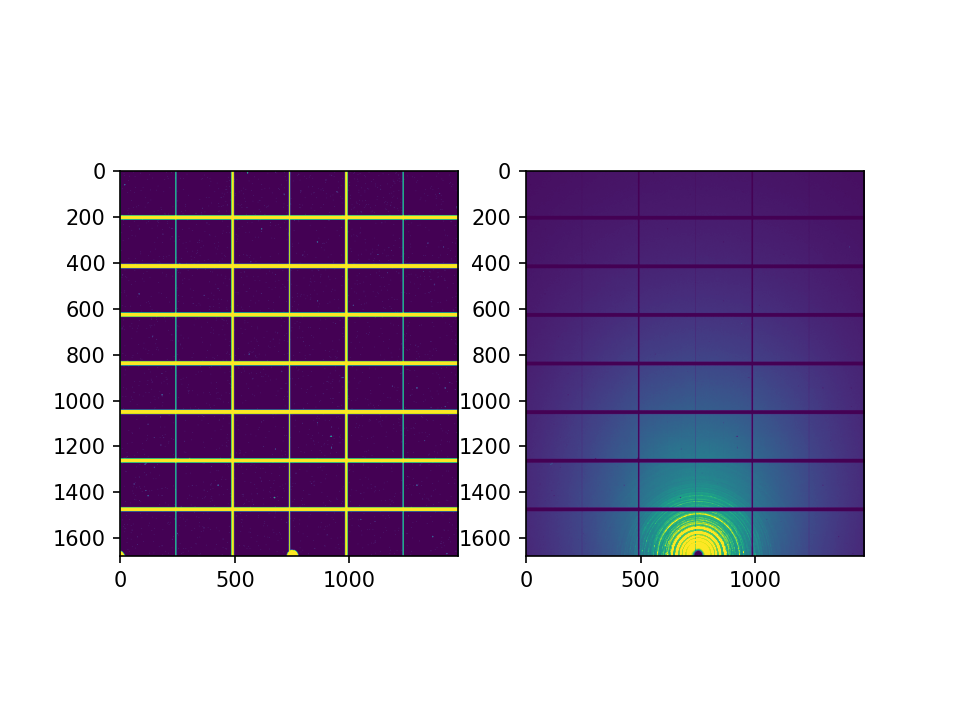

glycine_B1mm_pdf_001_dtx_0_0017p.cbf


<IPython.core.display.Javascript object>


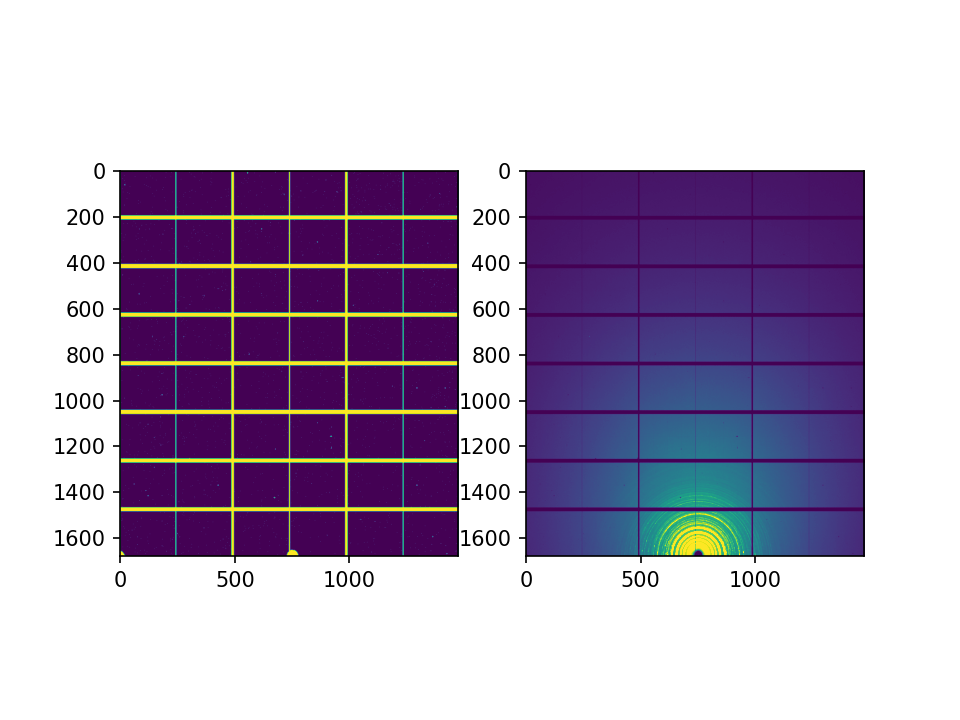

glycine_B1mm_pdf_001_dtx_0_0018p.cbf


<IPython.core.display.Javascript object>


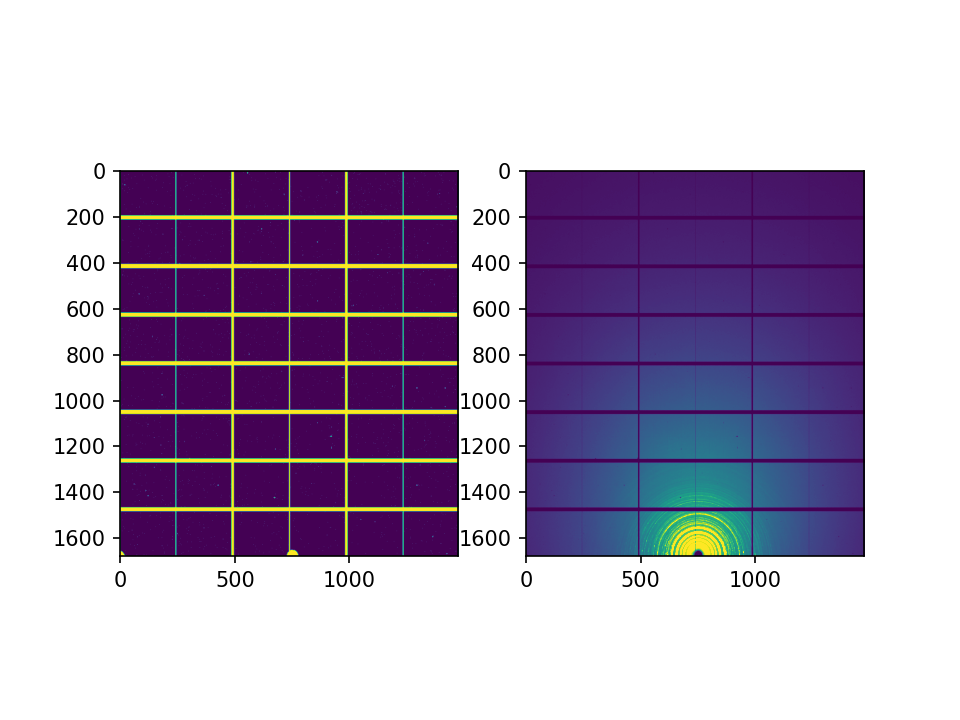

glycine_B1mm_pdf_001_dtx_0_0019p.cbf


<IPython.core.display.Javascript object>


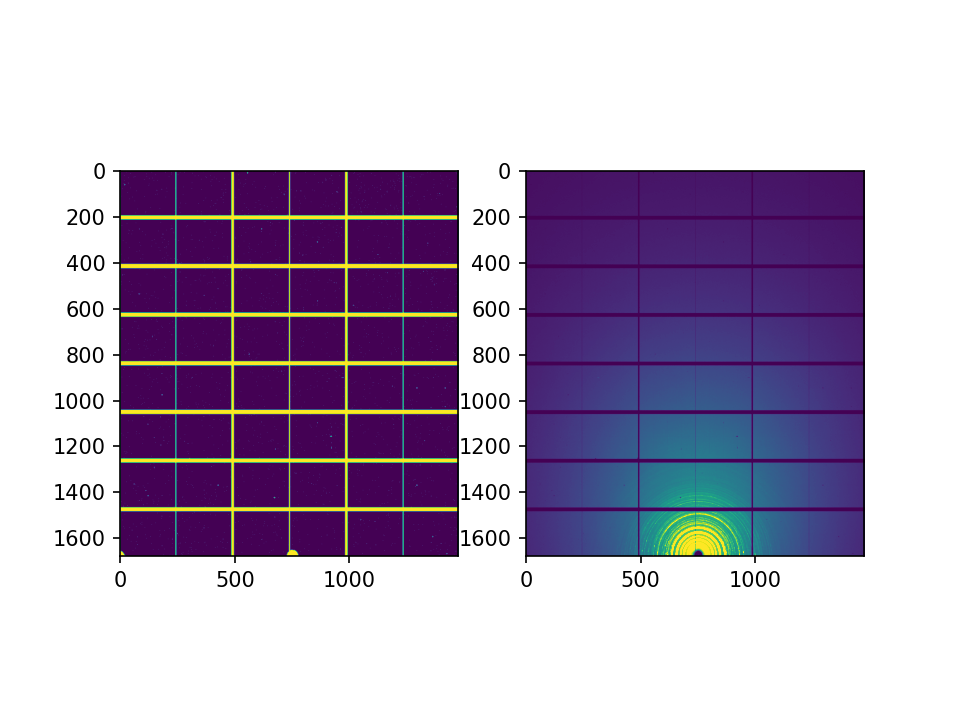

glycine_B1mm_pdf_001_dtx_0_0020p.cbf


<IPython.core.display.Javascript object>


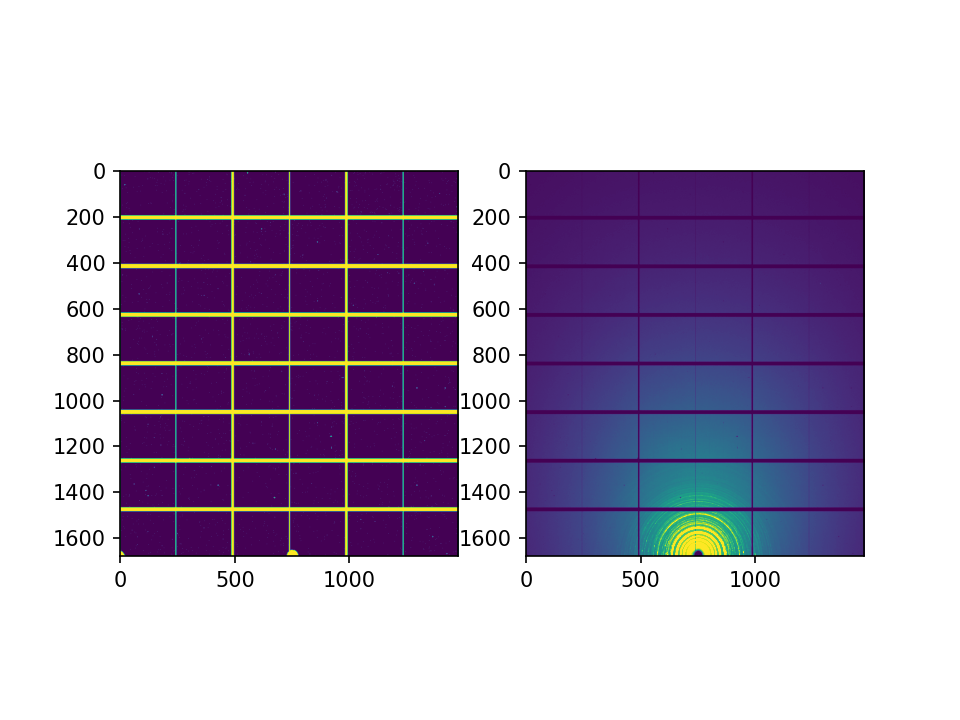

In [163]:
%matplotlib nbagg
maskdct = {}
nstdevs = 3
for c in range(len(files)):
    print(files[c])
    array = dataset[:,:,c]
    vmax = np.percentile(np.where(np.isnan(array),0,array),99.5)
    maskdct[c] = np.where(array > median+nstdevs*stdev,1,mask)
    fig,ax = plt.subplots(1,2,dpi = 150)
    ax[0].imshow(maskdct[c])
    ax[1].imshow(array,vmax = vmax)
    plt.show()

In [166]:
subdir = f'xye_{nstdevs}stdevs/'
clearHeader = True

if not os.path.exists(dest  + 'average/'):
    os.makedirs(dest  + 'average/')

dataset2 = np.empty(shape = dataset.shape)
for n in maskdct:
    dataset2[:,:,n] = np.where(maskdct[n] == 0, dataset[:,:,n], np.nan)
avim = np.nanmean(dataset2, axis = 2)
avim = np.where(np.isnan(avim), -2, avim)
im = fabio.cbfimage.CbfImage(avim)
im.save(f'{dest}/average/average.cbf')


if not os.path.exists(dest + subdir + 'average/'):
    os.makedirs(dest + subdir + 'average/')


    
for c,file in enumerate(files):
    print(file)
    xyefile = file.replace('.cbf','.xye')
    outputfile = f'{dest}{subdir}{xyefile}'
    poni.integrate1d(data = dataset[:,:,c], filename = outputfile,mask = maskdct[c],polarization_factor = 0.99,unit = '2th_deg',
                    correctSolidAngle = True, method = 'bbox',npt = 5000, error_model = 'poisson')
    x,y,e = np.loadtxt(outputfile,unpack = True,comments = '#')
    if clearHeader:
        np.savetxt(outputfile,np.array([x,y,e]).transpose(),fmt = '%.6e')
    if c == 0:
        av1d = np.empty(shape = (len(y),len(files)))
        eav = np.empty(shape = (len(y),len(files)))
    av1d[:,c] = y
    eav[:,c] = e
av1d = np.average(av1d,axis=1)
eav = np.average(eav,axis = 1)
np.savetxt(f'{dest}{subdir}average/{xyefile}',np.array([x,av1d,eav]).transpose())

qav = av1d*4*np.pi*np.sin(x*np.pi/(180*2))/0.25509
np.savetxt(f'{dest}{subdir}average/qav.xy',np.array([x,qav]).transpose())

C:\Users\opd31\AppData\Local\Temp\ipykernel_12888\3036551799.py:10: RuntimeWarning: Mean of empty slice
  avim = np.nanmean(dataset2, axis = 2)


glycine_B1mm_pdf_001_dtx_0_0001p.cbf


glycine_B1mm_pdf_001_dtx_0_0002p.cbf


glycine_B1mm_pdf_001_dtx_0_0003p.cbf


glycine_B1mm_pdf_001_dtx_0_0004p.cbf


glycine_B1mm_pdf_001_dtx_0_0005p.cbf
glycine_B1mm_pdf_001_dtx_0_0006p.cbf


glycine_B1mm_pdf_001_dtx_0_0007p.cbf


glycine_B1mm_pdf_001_dtx_0_0008p.cbf


glycine_B1mm_pdf_001_dtx_0_0009p.cbf


glycine_B1mm_pdf_001_dtx_0_0010p.cbf
glycine_B1mm_pdf_001_dtx_0_0011p.cbf


glycine_B1mm_pdf_001_dtx_0_0012p.cbf
glycine_B1mm_pdf_001_dtx_0_0013p.cbf


glycine_B1mm_pdf_001_dtx_0_0014p.cbf


glycine_B1mm_pdf_001_dtx_0_0015p.cbf


glycine_B1mm_pdf_001_dtx_0_0016p.cbf
glycine_B1mm_pdf_001_dtx_0_0017p.cbf


glycine_B1mm_pdf_001_dtx_0_0018p.cbf


glycine_B1mm_pdf_001_dtx_0_0019p.cbf
glycine_B1mm_pdf_001_dtx_0_0020p.cbf


In [152]:
#help(poni.integrate1d)

In [70]:
subdir = f'xye_polarisation/'
clearHeader = True

if not os.path.exists(dest + subdir):
    os.makedirs(dest + subdir)

polarisations = np.arange(0,0.991,0.1)
for p in polarisations:
    p = np.round(p,2)
    file = files[0]
    print(file)
    xyefile = file.replace('.cbf',f'p={p:.2f}.xye')
    edffile = file.replace('.cbf',f'p={p:.2f}.edf')
    outputfile = f'{dest}{subdir}{xyefile}'
    outputfileedf = f'{dest}{subdir}{edffile}'
    poni.integrate1d(data = dataset[:,:,0], filename = outputfile,mask = maskdct[c],polarization_factor = p,unit = '2th_deg',
                    correctSolidAngle = True, method = 'bbox',npt = 5000, error_model = 'poisson')
    poni.integrate2d(data = dataset[:,:,0], filename = outputfileedf,mask = maskdct[c],polarization_factor =p,unit = '2th_deg',
                    correctSolidAngle = True, method = 'bbox',npt_rad = 5000, npt_azim = 360, error_model = 'poisson')

    x,y,e = np.loadtxt(outputfile,unpack = True, comments = '#')
    np.savetxt(outputfile, np.array([x,y,e]).transpose())

SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf


SmBr3_g0p3_001_dtx_0_0001p.cbf
